In [766]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

In [767]:
house_price = pd.read_csv('train.csv')

In [768]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [769]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [770]:
corr_matrix = house_price.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Data Cleaning

#### Fill NaN value on numberic with mean 

In [771]:
df_contain_null = house_price.select_dtypes(include=['float64','int64']).isnull().sum()[house_price.select_dtypes(include=['float64','int64']).isnull().sum()>0]

In [772]:
list_df_contain_null = df_contain_null.index.tolist()
list_df_contain_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [773]:
for col in list_df_contain_null:
    house_price[col]=house_price[col].fillna(round(house_price[col].mean(),2))


In [774]:
df_contain_null = house_price.select_dtypes(include=['float64','int64']).isnull().sum()[house_price.select_dtypes(include=['float64','int64']).isnull().sum()>0]
df_contain_null

Series([], dtype: int64)

#### Delete Columns contains NaN value > 10% 

In [775]:
df_contain_null = house_price.select_dtypes(include='object').isnull().sum()[house_price.select_dtypes(include='object').isnull().sum()>0]
df_contain_null

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [776]:
house_price.shape[0]
print(type(df_contain_null))
df_contain_null = df_contain_null.to_frame()
df_contain_null["percent_null"] = df_contain_null[0]/house_price.shape[0]
df_contain_null

<class 'pandas.core.series.Series'>


,0,percent_null
Alley,1369,0.937671
MasVnrType,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685
FireplaceQu,690,0.472603
GarageType,81,0.055479


In [777]:
del_col = df_contain_null[df_contain_null["percent_null"]>0.1].index.tolist()
del_col

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [778]:
house_price = house_price.drop(del_col,axis='columns')

In [779]:
df_contain_null = house_price.select_dtypes(include='object').isnull().sum()[house_price.select_dtypes(include='object').isnull().sum()>0]
df_contain_null

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [780]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [781]:
house_price = house_price.drop('Id',axis='columns')

#### Visualization Outliner

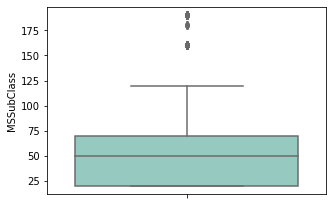

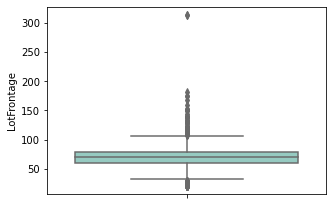

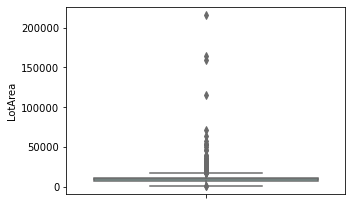

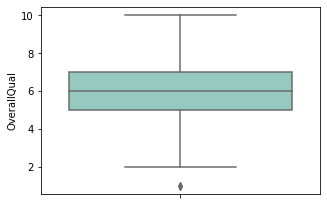

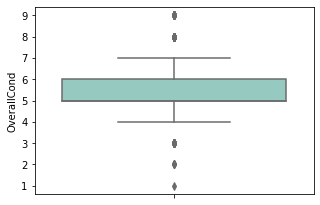

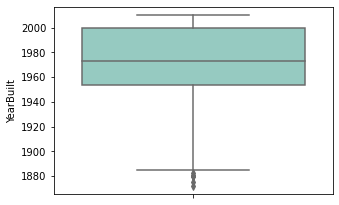

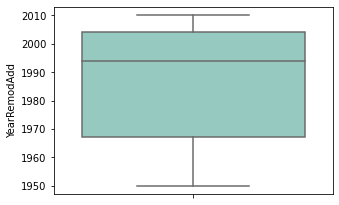

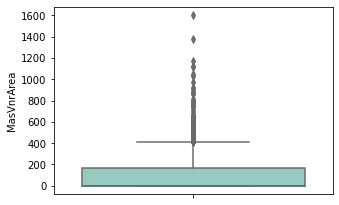

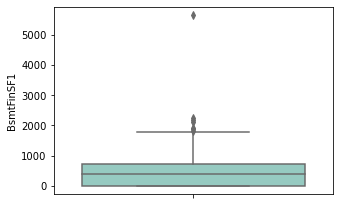

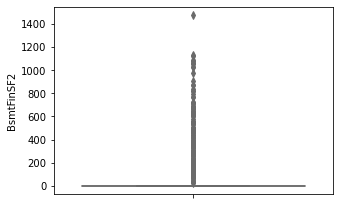

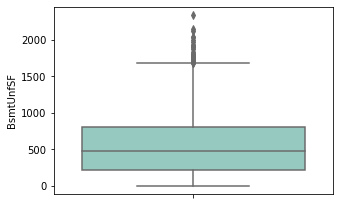

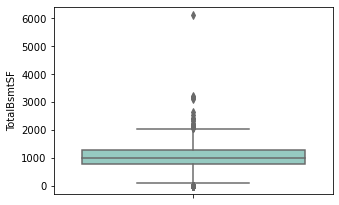

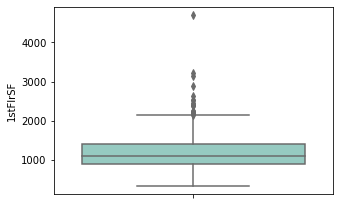

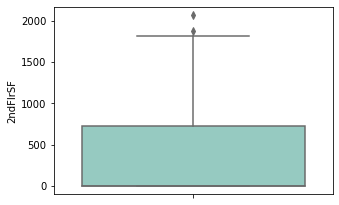

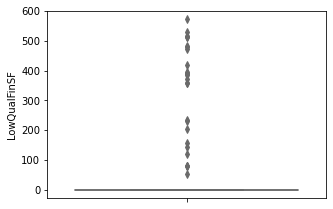

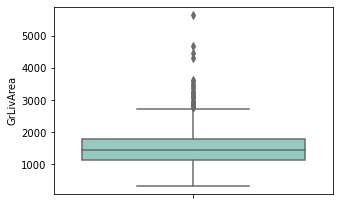

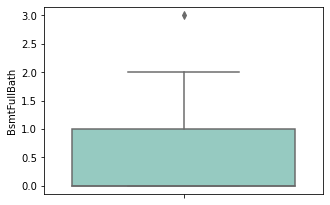

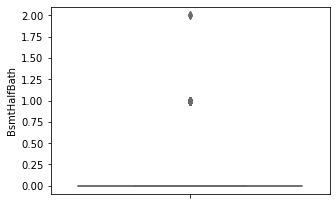

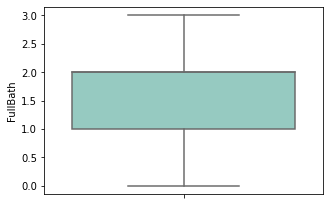

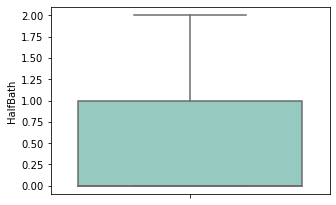

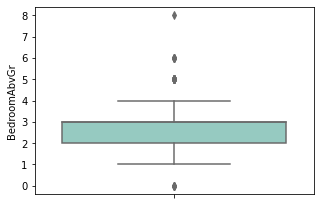

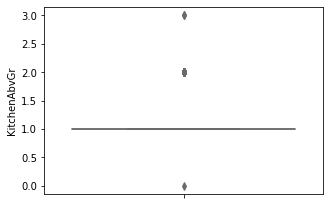

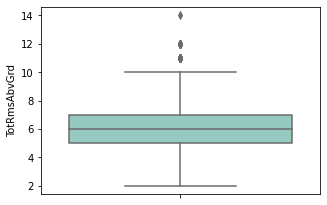

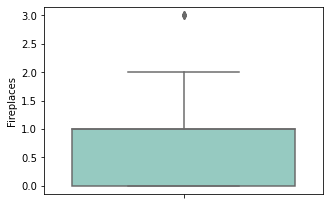

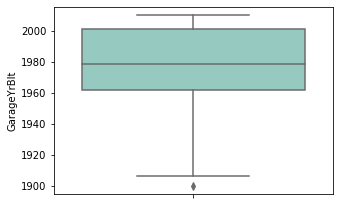

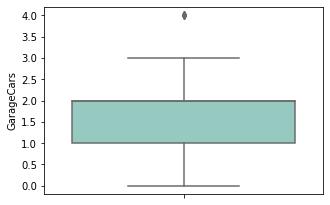

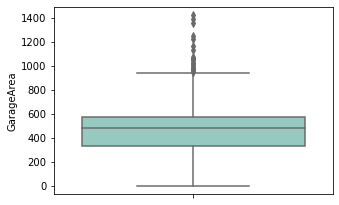

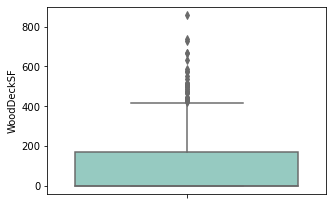

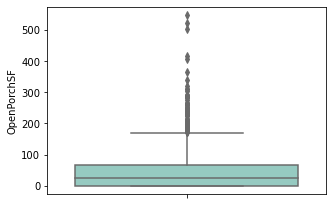

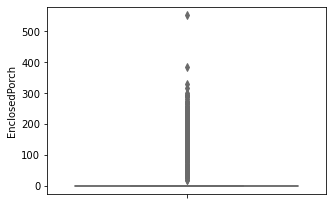

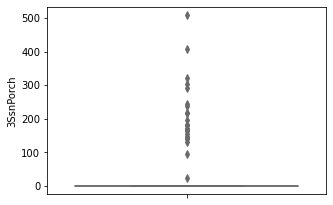

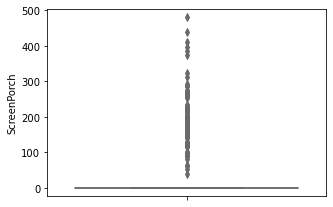

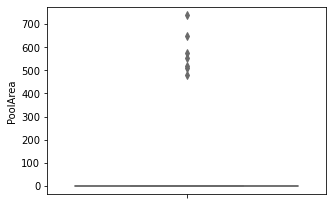

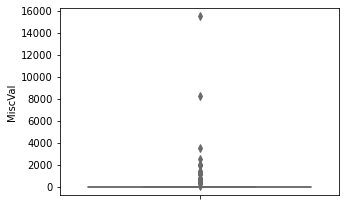

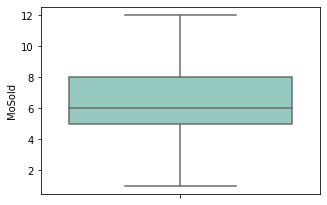

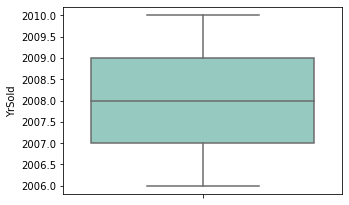

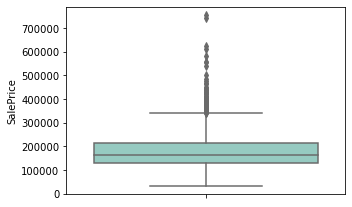

In [782]:
numeric_col = list(house_price.dtypes[house_price.dtypes !='object'].index)

for x in numeric_col:
    plt.figure(figsize=(17, 20))
    plt.subplot(5,3,1)
    sns.boxplot(y = x, palette='Set3', data = house_price)
    plt.show()    



##### drop outlier

In [783]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)

def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

In [784]:
house_price = drop_outliers(house_price)

In [785]:
house_price.shape

(1439, 75)

### Data Preparation

##### change object to dummy variable

In [786]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [787]:
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,3,Lvl,AllPub,Inside,0,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,3,Lvl,AllPub,FR2,0,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,Lvl,AllPub,Corner,0,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,Lvl,AllPub,FR2,0,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [788]:
# find columns type object and create dummy variable
# col_for_create_dummy = house_price[[house_price.dtypes == 'object']]
# col_for_create_dummy
col_for_create_dummy = house_price.dtypes[house_price.dtypes=='object'].index.tolist()

In [789]:
house_price[col_for_create_dummy]

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,Pave,Lvl,AllPub,Inside,Somerst,Norm,Norm,1Fam,1Story,...,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1455,RL,Pave,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,...,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1456,RL,Pave,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,...,Plywood,Stone,CBlock,GasA,SBrkr,Min1,Attchd,Y,WD,Normal
1458,RL,Pave,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,...,MetalSd,None,CBlock,GasA,FuseA,Typ,Attchd,Y,WD,Normal


In [790]:
def gen_dummy_variable(col_name, df):
    data = pd.get_dummies(df[col_name], drop_first = True)
    df = pd.concat([df, data], axis = 1)
    return df

In [791]:
for col_name in col_for_create_dummy:
      house_price = gen_dummy_variable(col_name, house_price)

In [792]:
house_price = house_price.drop(col_for_create_dummy,axis='columns')

In [793]:
house_price.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,3,0,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


### Train Test Split

In [794]:
df_train, df_test = train_test_split(house_price, train_size=0.8, test_size=0.2, random_state=100)

In [795]:
print(df_train.shape)
print(df_test.shape)

(1151, 197)
(288, 197)


#### Feature Scaling

In [796]:
from sklearn.preprocessing import MinMaxScaler

In [797]:
scaler = MinMaxScaler()

In [798]:
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
108,0.176471,0.397516,0.103655,1.0,0.0,0.444444,0.75,0.343066,0.916667,0.0000,...,0,0,0,0,1,0,0,0,1,0
750,0.176471,0.211180,0.107974,1.0,0.0,0.333333,0.75,0.277372,0.900000,0.0000,...,0,0,0,0,1,0,0,0,1,0
456,0.294118,0.080745,0.047091,1.0,0.0,0.444444,0.50,0.321168,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0
1092,0.176471,0.242236,0.102216,1.0,0.0,0.555556,0.50,0.386861,0.000000,0.0000,...,0,0,0,0,1,0,0,0,1,0
1324,0.000000,0.335404,0.125049,1.0,0.0,0.777778,0.50,0.978102,0.950000,0.2675,...,0,0,1,0,0,0,0,0,0,1


In [799]:
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
108,0.176471,0.397516,0.103655,1.0,0.0,0.444444,0.75,0.343066,0.916667,0.0000,...,0,0,0,0,1,0,0,0,1,0
750,0.176471,0.211180,0.107974,1.0,0.0,0.333333,0.75,0.277372,0.900000,0.0000,...,0,0,0,0,1,0,0,0,1,0
456,0.294118,0.080745,0.047091,1.0,0.0,0.444444,0.50,0.321168,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0
1092,0.176471,0.242236,0.102216,1.0,0.0,0.555556,0.50,0.386861,0.000000,0.0000,...,0,0,0,0,1,0,0,0,1,0
1324,0.000000,0.335404,0.125049,1.0,0.0,0.777778,0.50,0.978102,0.950000,0.2675,...,0,0,1,0,0,0,0,0,0,1


In [800]:
for x in df_train.select_dtypes(include=['float64']).columns.tolist():
    df_train[x] = round(df_train[x],2)
    print(df_train[x])

108     0.18
750     0.18
456     0.29
1092    0.18
1324    0.00
        ... 
814     0.18
53      0.00
356     0.00
79      0.18
803     0.24
Name: MSSubClass, Length: 1151, dtype: float64
108     0.40
750     0.21
456     0.08
1092    0.24
1324    0.34
        ... 
814     0.15
53      0.29
356     0.30
79      0.24
803     0.53
Name: LotFrontage, Length: 1151, dtype: float64
108     0.10
750     0.11
456     0.05
1092    0.10
1324    0.13
        ... 
814     0.10
53      0.71
356     0.11
79      0.13
803     0.18
Name: LotArea, Length: 1151, dtype: float64
108     1.0
750     1.0
456     1.0
1092    1.0
1324    1.0
       ... 
814     1.0
53      0.0
356     0.0
79      1.0
803     1.0
Name: LotShape, Length: 1151, dtype: float64
108     0.0
750     0.0
456     0.0
1092    0.0
1324    0.0
       ... 
814     0.0
53      0.0
356     0.0
79      0.0
803     0.0
Name: LandSlope, Length: 1151, dtype: float64
108     0.44
750     0.33
456     0.44
1092    0.56
1324    0.78
        ... 

In [801]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [802]:
y_train.head()

108     0.11
750     0.09
456     0.09
1092    0.14
1324    0.16
Name: SalePrice, dtype: float64

In [803]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
108,0.18,0.40,0.10,1.0,0.0,0.44,0.75,0.34,0.92,0.00,...,0,0,0,0,1,0,0,0,1,0
750,0.18,0.21,0.11,1.0,0.0,0.33,0.75,0.28,0.90,0.00,...,0,0,0,0,1,0,0,0,1,0
456,0.29,0.08,0.05,1.0,0.0,0.44,0.50,0.32,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1092,0.18,0.24,0.10,1.0,0.0,0.56,0.50,0.39,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
1324,0.00,0.34,0.13,1.0,0.0,0.78,0.50,0.98,0.95,0.27,...,0,0,1,0,0,0,0,0,0,1


In [804]:
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [805]:
df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols]) 
df_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
57,0.235294,0.462585,0.270231,0.0,0.0,0.666667,0.428571,0.955556,0.900000,0.000000,...,0,0,0,0,1,0,0,0,1,0
614,0.941176,0.000000,0.000372,1.0,0.0,0.333333,0.571429,0.718519,0.366667,0.000000,...,0,0,0,0,1,0,0,0,1,0
367,0.352941,0.544218,0.203923,0.0,0.0,0.555556,0.428571,0.644444,0.200000,0.387056,...,0,0,0,0,1,0,0,0,1,0
957,0.000000,0.333333,0.157945,1.0,0.0,0.444444,0.428571,0.644444,0.200000,0.000000,...,0,0,0,0,1,0,0,0,1,0
679,0.000000,0.333673,0.225051,0.0,0.0,0.444444,0.428571,0.637037,0.183333,0.072335,...,0,0,0,0,1,0,0,0,1,0


In [837]:
# y_test = df_test.pop('SalePrice')
X_test = df_test
X_test = X_test['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',
 'RRAe',
 'RRAn',
 'RRNe',
 'RRNn',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',
 'RRAn',
 'RRNn',
 '2fmCon',
 'Duplex',
 'Twnhs',
 'TwnhsE',
 '1.5Unf',
 '1Story',
 '2.5Fin',
 '2.5Unf',
 '2Story',
 'SFoyer',
 'SLvl',
 'Gable',
 'Gambrel',
 'Hip',
 'Mansard',
 'Shed',
 'Membran',
 'Metal',
 'Roll',
 'Tar&Grv',
 'WdShake',
 'WdShngl',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing',
 'AsphShn',
 'Brk Cmn',
 'BrkFace',
 'CBlock',
 'CmentBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Other',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'Wd Shng',
 'BrkFace',
 'None',
 'Stone',
 'CBlock',
 'PConc',
 'Slab',
 'Stone',
 'Wood',
 'GasA',
 'GasW',
 'Grav',
 'OthW',
 'Wall',
 'FuseF',
 'FuseP',
 'Mix',
 'SBrkr',
 'Maj2',
 'Min1',
 'Min2',
 'Mod',
 'Sev',
 'Typ',
 'Attchd',
 'Basment',
 'BuiltIn',
 'CarPort',
 'Detchd',
 'P',
 'Y',
 'CWD',
 'Con',
 'ConLD',
 'ConLI',
 'ConLw',
 'New',
 'Oth',
 'WD',
 'AdjLand',
 'Alloca',
 'Family',
 'Normal',
 'Partial']

X_test.head()


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
57,0.235294,0.462585,0.270231,0.0,0.0,0.666667,0.428571,0.955556,0.900000,0.000000,...,0,0,0,0,1,0,0,0,1,0
614,0.941176,0.000000,0.000372,1.0,0.0,0.333333,0.571429,0.718519,0.366667,0.000000,...,0,0,0,0,1,0,0,0,1,0
367,0.352941,0.544218,0.203923,0.0,0.0,0.555556,0.428571,0.644444,0.200000,0.387056,...,0,0,0,0,1,0,0,0,1,0
957,0.000000,0.333333,0.157945,1.0,0.0,0.444444,0.428571,0.644444,0.200000,0.000000,...,0,0,0,0,1,0,0,0,1,0
679,0.000000,0.333673,0.225051,0.0,0.0,0.444444,0.428571,0.637037,0.183333,0.072335,...,0,0,0,0,1,0,0,0,1,0


In [838]:
print(len(X_test.columns.tolist()))
print(len(X_train.columns.tolist()))


196
196


#### Building the model

In [839]:
import sklearn.metrics as metrics

In [840]:
for col in X_train.loc[:, X_train.isna().any()]:
    X_train[col] = X_train[col].fillna(round(X_train[col].mean(),2))

In [841]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [842]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.9192681591750993

In [847]:
for col in X_test.loc[:, X_test.isna().any()]:
    X_test[col] = X_test[col].fillna(round(X_test[col].mean(),2))

In [848]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

-1.0610704467829333e+22

In [849]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [851]:
ridge = Ridge()

In [852]:
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [853]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010043,0.008138,0.003748,0.000830,0.0001,{'alpha': 0.0001},0.862670,0.856058,0.871238,0.729093,...,0.820156,0.055634,23,0.923285,0.920517,0.920622,0.933144,0.936846,0.926883,0.006799
1,0.004855,0.000514,0.002881,0.000353,0.001,{'alpha': 0.001},0.862789,0.856247,0.871264,0.729142,...,0.820277,0.055634,22,0.923278,0.920516,0.920620,0.933142,0.936844,0.926880,0.006800
2,0.004839,0.000301,0.003117,0.000761,0.01,{'alpha': 0.01},0.863338,0.857498,0.871474,0.729756,...,0.821241,0.055419,21,0.923178,0.920496,0.920581,0.933111,0.936801,0.926834,0.006803
3,0.005469,0.000604,0.003052,0.000410,0.05,{'alpha': 0.05},0.864531,0.861409,0.872544,0.732586,...,0.824753,0.054282,20,0.923005,0.920414,0.920508,0.933042,0.936585,0.926711,0.006774
4,0.004734,0.000252,0.002581,0.000130,0.1,{'alpha': 0.1},0.865365,0.865182,0.873783,0.735501,...,0.828200,0.053199,19,0.922795,0.920256,0.920395,0.932938,0.936164,0.926510,0.006706


In [854]:
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

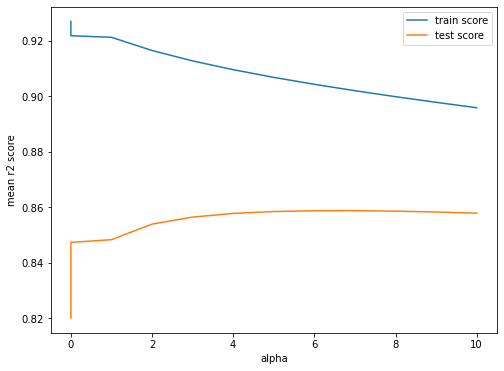

In [855]:
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [856]:
model_ridge = Ridge(alpha=2)
model_ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [857]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9119137709031502


In [858]:
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.6773092019481055


In [859]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, y_train)
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.9155376449753407
0.7023264984897912


In [866]:
model_ridge = Ridge(alpha=0.0001)
model_ridge.fit(X_train, y_train)
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.9192790998386015
0.7485936605066268


###### Conclusion
We have a good train score 91% and good test score as well 74%. That means what the model learnt in the train set it performed well in the test set.

In [867]:
model_ridge_parameters = list(model_ridge.coef_)
model_ridge_parameters.insert(0, model_ridge.intercept_)
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', -0.215),
 ('MSSubClass', -0.028),
 ('LotFrontage', 0.027),
 ('LotArea', 0.077),
 ('LotShape', 0.004),
 ('LandSlope', 0.009),
 ('OverallQual', 0.089),
 ('OverallCond', 0.056),
 ('YearBuilt', 0.044),
 ('YearRemodAdd', 0.003),
 ('MasVnrArea', 0.084),
 ('ExterQual', 0.025),
 ('ExterCond', -0.008),
 ('BsmtQual', 0.017),
 ('BsmtCond', -0.002),
 ('BsmtExposure', 0.023),
 ('BsmtFinType1', 0.003),
 ('BsmtFinSF1', -0.132),
 ('BsmtFinType2', 0.009),
 ('BsmtFinSF2', -0.121),
 ('BsmtUnfSF', -0.197),
 ('TotalBsmtSF', 0.335),
 ('HeatingQC', 0.003),
 ('CentralAir', 0.001),
 ('1stFlrSF', 0.113),
 ('2ndFlrSF', 0.116),
 ('LowQualFinSF', 0.017),
 ('GrLivArea', 0.087),
 ('BsmtFullBath', 0.003),
 ('BsmtHalfBath', -0.002),
 ('FullBath', 0.008),
 ('HalfBath', 0.003),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.04),
 ('KitchenQual', 0.026),
 ('TotRmsAbvGrd', 0.049),
 ('Fireplaces', 0.009),
 ('GarageYrBlt', -0.002),
 ('GarageFinish', 0.004),
 ('GarageCars', 0.017),
 ('GarageArea', 0.026),
 ('G

In [868]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
21,TotalBsmtSF,0.335
124,WdShngl,0.138
25,2ndFlrSF,0.116
24,1stFlrSF,0.113
6,OverallQual,0.089
27,GrLivArea,0.087
10,MasVnrArea,0.084
3,LotArea,0.077
189,New,0.076
52,FV,0.059


In [869]:
lasso = Lasso()

In [870]:
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [871]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.034724,0.011889,0.003047,0.000338,0.0001,{'alpha': 0.0001},0.861404,0.891643,0.895340,0.750388,...,0.846232,0.053069,1,0.911457,0.910763,0.909320,0.921309,0.925269,0.915623,0.006420
1,0.008108,0.001595,0.003273,0.000821,0.001,{'alpha': 0.001},0.817791,0.877254,0.862989,0.771649,...,0.832103,0.037024,2,0.848977,0.848680,0.846126,0.871718,0.845709,0.852242,0.009826
2,0.004584,0.000101,0.002547,0.000093,0.01,{'alpha': 0.01},0.274082,0.395066,0.377204,0.413018,...,0.349675,0.056966,3,0.345924,0.362926,0.373557,0.346861,0.336897,0.353233,0.013175
3,0.004610,0.000250,0.002823,0.000241,0.05,{'alpha': 0.05},-0.002455,-0.001251,-0.027714,-0.001485,...,-0.010537,0.011081,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004895,0.000874,0.003337,0.000760,0.1,{'alpha': 0.1},-0.002455,-0.001251,-0.027714,-0.001485,...,-0.010537,0.011081,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [872]:
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

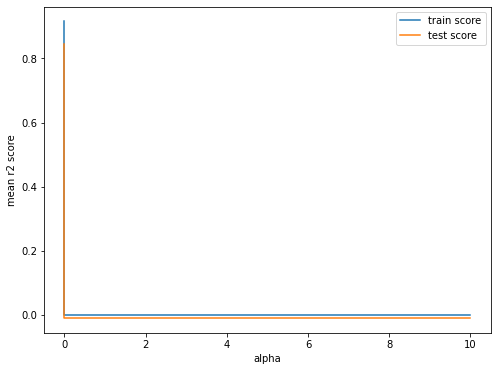

In [873]:
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [882]:
model_lasso = Lasso(0.0001)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [883]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9090425306035969


In [884]:
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.6804473330156466


##### Conclusion
We have train set accuracy 75% whereas test set accuracy is 70%. From the accuracy gap, we can conclude that what the model learnt on the train set, it performed well on the test set.

